In [1]:
import numpy as np
import pandas as pd
import pygrgl
import matplotlib.pyplot as plt

import sys
sys.path.append('/Users/adityasyam/compgen/grg_pheno_sim') 

from grg_pheno_sim.effect_size import sim_grg_causal_mutation, additive_effect_sizes, samples_to_individuals, normalize_genetic_values
from grg_pheno_sim.model import grg_causal_mutation_model
from grg_pheno_sim.noise_sim import sim_env_noise
from grg_pheno_sim.normalization import normalize
from grg_pheno_sim.split import split_phenotypes


In [2]:
grg_1 = pygrgl.load_immutable_grg("test-200-samples.vcf.gz.final.grg") #loading in a sample grg stored in the same directory


In [3]:
rng = np.random.default_rng()

mean_1 = np.zeros(2)
cov_1 = np.eye(2) 
model_normal_multi = grg_causal_mutation_model("multivariate normal", mean=mean_1, cov=cov_1)

#simulating effect sizes using just the model
num_causal = 1000  #number of causal sites

effect_sizes = model_normal_multi.sim_effect_size(num_causal, rng)

print("Simulated Effect Sizes:", effect_sizes)

Simulated Effect Sizes: [[ 0.11983619  0.40540354]
 [ 1.58061825 -1.07392394]
 [-0.83457518  1.31420632]
 ...
 [ 0.32724119 -0.01764411]
 [ 0.06657986 -1.13553874]
 [ 0.30724085 -0.29167851]]


In [4]:
trait_df_normal_multi = sim_grg_causal_mutation(grg_1, num_causal=num_causal, model=model_normal_multi, random_seed=1)
sample_nodes_df_multi = additive_effect_sizes(grg_1, trait_df_normal_multi)
individuals = samples_to_individuals(sample_nodes_df_multi)
normalized_individual_multi_normal = normalize_genetic_values(individuals)


First, we will demonstrate how to simulate user-defined noise for multiple causal mutations (if the user does not want to use the h2 heritability feature). In this case, the user must specify the mean and covariance matrix to be used.

In [5]:
std_means = np.array([0, 0])
std_covariances = np.array([[1, 0], [0, 1]])
phenotypes_user_defined_multi_normal = sim_env_noise(individuals, user_defined=True, means=std_means, cov=std_covariances) #simulates noise from the multivariate standard normal distribution with means of zero and an identity matrix for covariance
phenotypes_user_defined_multi_normal_df = phenotypes_user_defined_multi_normal.phenotype_df
phenotypes_user_defined_multi_normal_df

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,6.275564,0.739196,7.014760
1,1,0,18.213929,0.182778,18.396707
2,0,1,-7.378554,-1.158529,-8.537083
3,1,1,15.733599,-0.010092,15.723507
4,0,2,9.299456,-1.251746,8.047710
...,...,...,...,...,...
395,1,197,-11.275729,0.972312,-10.303418
396,0,198,23.609482,1.292638,24.902120
397,1,198,6.534328,0.732335,7.266663
398,0,199,23.023712,-0.815013,22.208699


The user can extract the h2 assigned to any phenotype simulation as follows.

In [6]:
user_defined_multi_h2 = phenotypes_user_defined_multi_normal.get_h2()
print(user_defined_multi_h2)

[1.03778318 1.02127921]


In [7]:
split_phenotypes(phenotypes_user_defined_multi_normal_df, return_print=True)

     causal_mutation_id  individual_id  genetic_value  environmental_noise  \
0                     0              0       6.275564             0.739196   
2                     0              1      -7.378554            -1.158529   
4                     0              2       9.299456            -1.251746   
6                     0              3      -7.524667            -0.709976   
8                     0              4       6.789070            -0.746749   
..                  ...            ...            ...                  ...   
390                   0            195      -8.058695            -0.390242   
392                   0            196       1.731902             1.318206   
394                   0            197       6.309163            -0.743680   
396                   0            198      23.609482             1.292638   
398                   0            199      23.023712            -0.815013   

     phenotype  
0     7.014760  
2    -8.537083  
4     8.0477

In [8]:
split_phenotypes_list = split_phenotypes(phenotypes_user_defined_multi_normal_df, return_list=True)
split_phenotypes_list[0] #the first dataframe

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,6.275564,0.739196,7.014760
2,0,1,-7.378554,-1.158529,-8.537083
4,0,2,9.299456,-1.251746,8.047710
6,0,3,-7.524667,-0.709976,-8.234642
8,0,4,6.789070,-0.746749,6.042321
...,...,...,...,...,...
390,0,195,-8.058695,-0.390242,-8.448937
392,0,196,1.731902,1.318206,3.050108
394,0,197,6.309163,-0.743680,5.565482
396,0,198,23.609482,1.292638,24.902120


In [9]:
split_phenotypes_list[1] #the second dataframe

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
1,1,0,18.213929,0.182778,18.396707
3,1,1,15.733599,-0.010092,15.723507
5,1,2,9.939483,0.067852,10.007334
7,1,3,16.790018,-1.400056,15.389963
9,1,4,4.777995,-0.615781,4.162214
...,...,...,...,...,...
391,1,195,-12.819220,-0.180404,-12.999623
393,1,196,-3.884612,1.311731,-2.572881
395,1,197,-11.275729,0.972312,-10.303418
397,1,198,6.534328,0.732335,7.266663


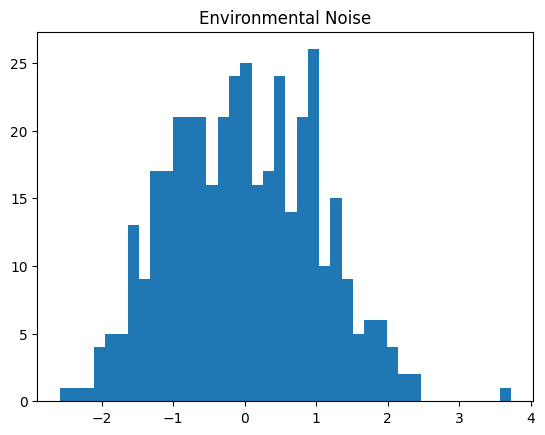

Mean of noise: -0.012529584986528479
Standard deviation of noise: 1.0225934143605855


In [10]:

plt.hist(phenotypes_user_defined_multi_normal_df["environmental_noise"], bins=40)
plt.title("Environmental Noise")
plt.show()
print("Mean of noise: " + str(phenotypes_user_defined_multi_normal_df['environmental_noise'].mean()))
print("Standard deviation of noise: " + str(phenotypes_user_defined_multi_normal_df['environmental_noise'].std()))

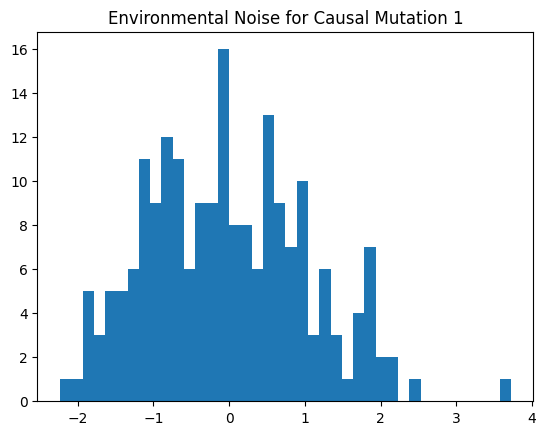

Mean of noise: -0.034644166346013784
Standard deviation of noise: 1.0551624896633407


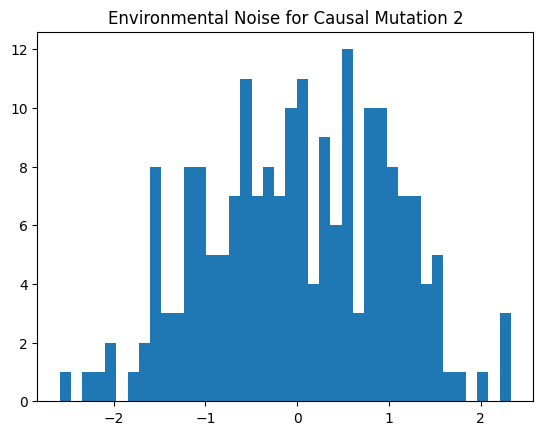

Mean of noise: 0.00958499637295683
Standard deviation of noise: 0.9911097004425804


In [11]:
df_dict_test = {k: v.sort_values('individual_id') for k, v in phenotypes_user_defined_multi_normal_df.groupby('causal_mutation_id')}

num = len(df_dict_test)

for i in range(num):
  temp_df = df_dict_test[i]
  plt.hist(temp_df["environmental_noise"], bins=40)
  plt.title("Environmental Noise for Causal Mutation " + str(i+1) )
  plt.show()
  print("Mean of noise: " + str(temp_df['environmental_noise'].mean()))
  print("Standard deviation of noise: " + str(temp_df['environmental_noise'].std()))

In [12]:
phenotypes_user_defined_multi_normal_df_normalized = normalize(phenotypes_user_defined_multi_normal)
phenotypes_user_defined_multi_normal_df_normalized

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,0.661807,0.078600,0.740408
1,1,0,1.174940,0.015683,1.190623
2,0,1,-0.725064,-0.114155,-0.839219
3,1,1,0.950334,-0.001782,0.948552
4,0,2,0.968949,-0.123623,0.845326
...,...,...,...,...,...
395,1,197,-1.495486,0.087179,-1.408307
396,0,198,2.422442,0.134814,2.557257
397,1,198,0.117297,0.065448,0.182746
398,0,199,2.362945,-0.079263,2.283681


In [13]:
means = np.array([0, 0])
covariance = np.array([[1, 0.25], [0.25, 1]])
phenotypes_user_defined_multi_normal_special_cov = sim_env_noise(individuals, user_defined=True, means=means, cov=covariance) #simulating noise using a user-defined covariance matrix instead of the identity matrix
phenotypes_user_defined_multi_normal_special_cov_df = phenotypes_user_defined_multi_normal_special_cov.phenotype_df
phenotypes_user_defined_multi_normal_special_cov_df

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,6.275564,1.670522,7.946086
1,1,0,18.213929,0.305365,18.519293
2,0,1,-7.378554,-2.307203,-9.685757
3,1,1,15.733599,-0.758706,14.974892
4,0,2,9.299456,-0.447379,8.852077
...,...,...,...,...,...
395,1,197,-11.275729,-0.488318,-11.764047
396,0,198,23.609482,-0.491675,23.117807
397,1,198,6.534328,-0.699543,5.834785
398,0,199,23.023712,-0.957385,22.066327


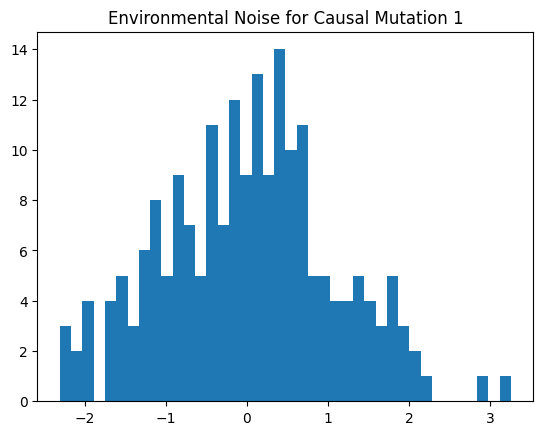

Mean of noise: 0.020448913657584028
Standard deviation of noise: 1.0655717587363416


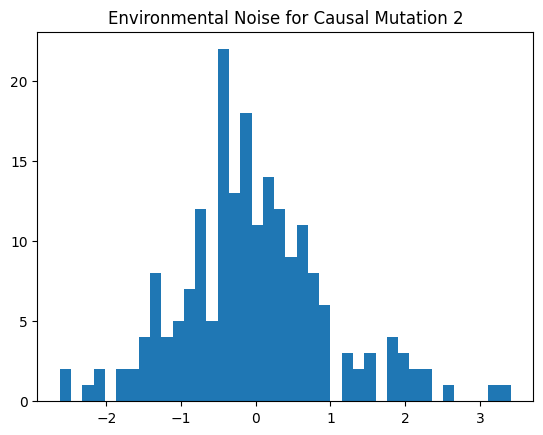

Mean of noise: -0.028835096580487204
Standard deviation of noise: 1.0004532072176837


In [14]:
df_dict_test_cov = {k: v.sort_values('individual_id') for k, v in phenotypes_user_defined_multi_normal_special_cov_df.groupby('causal_mutation_id')}

num = len(df_dict_test_cov)

for i in range(num):
  temp_df = df_dict_test_cov[i]
  plt.hist(temp_df["environmental_noise"], bins=40)
  plt.title("Environmental Noise for Causal Mutation " + str(i+1) )
  plt.show()
  print("Mean of noise: " + str(temp_df['environmental_noise'].mean()))
  print("Standard deviation of noise: " + str(temp_df['environmental_noise'].std()))

In [15]:
phenotypes_user_defined_multi_normal_special_cov_df_normalized = normalize(phenotypes_user_defined_multi_normal_special_cov, normalize_genetic_values=True)
phenotypes_user_defined_multi_normal_special_cov_df_normalized

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,0.647961,0.164094,0.812055
1,1,0,1.163384,0.029966,1.193350
2,0,1,-0.709894,-0.231477,-0.941371
3,1,1,0.940988,-0.065443,0.875545
4,0,2,0.948676,-0.046524,0.902152
...,...,...,...,...,...
395,1,197,-1.480779,-0.041199,-1.521978
396,0,198,2.371759,-0.050929,2.320830
397,1,198,0.116144,-0.060138,0.056005
398,0,199,2.313506,-0.097242,2.216264


In [16]:
phenotypes_zero_noise = sim_env_noise(individuals) #simulates zero noise (assumes h2 is an array of 1s)
phenotypes_zero_noise_df = phenotypes_zero_noise.phenotype_df
phenotypes_zero_noise_df

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,6.275564,0.0,6.275564
1,1,0,18.213929,0.0,18.213929
2,0,1,-7.378554,0.0,-7.378554
3,1,1,15.733599,0.0,15.733599
4,0,2,9.299456,0.0,9.299456
...,...,...,...,...,...
395,1,197,-11.275729,0.0,-11.275729
396,0,198,23.609482,0.0,23.609482
397,1,198,6.534328,0.0,6.534328
398,0,199,23.023712,0.0,23.023712


Now, we show the usage of the narrow-sense heritability feature to simulate noise for multiple causal mutations (for a dataframe where genetic values have not yet been normalized).

In [17]:
phenotype_multi_normal_h2 = sim_env_noise(individuals, h2=[0.5, 0.75]) #simulating environmental noise for 2 causal mutations without normalizing genetic values
phenotype_multi_normal_h2_df = phenotype_multi_normal_h2.phenotype_df
phenotype_multi_normal_h2_df

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,6.275564,6.934773,13.210337
1,1,0,18.213929,-1.249540,16.964388
2,0,1,-7.378554,-20.336538,-27.715092
3,1,1,15.733599,12.057333,27.790932
4,0,2,9.299456,-1.907618,7.391838
...,...,...,...,...,...
395,1,197,-11.275729,9.345004,-1.930725
396,0,198,23.609482,-13.802512,9.806970
397,1,198,6.534328,-11.357920,-4.823592
398,0,199,23.023712,6.271831,29.295542


In [18]:
print(phenotype_multi_normal_h2.get_h2()) #printing the h2 used for the simulation

[0.5, 0.75]


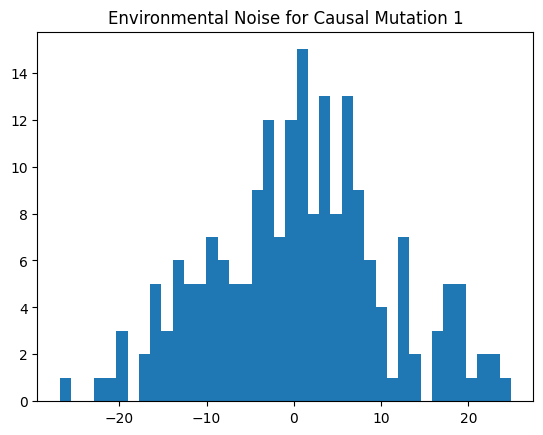

Mean of noise: 0.5254055482542764
Standard deviation of noise: 10.106038719333377


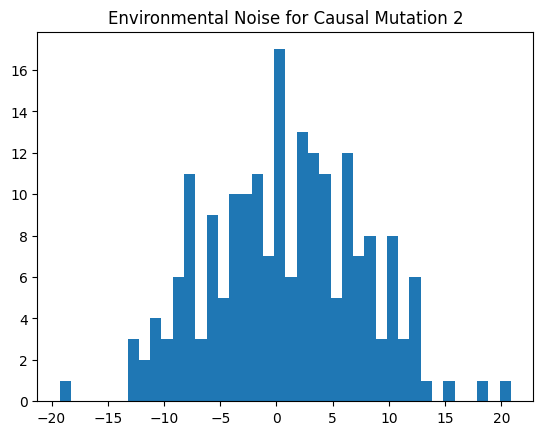

Mean of noise: 0.8214811560875003
Standard deviation of noise: 6.798073158747901


In [19]:
df_dict_test_pre_normal = {k: v.sort_values('individual_id') for k, v in phenotype_multi_normal_h2_df.groupby('causal_mutation_id')}

num = len(df_dict_test_pre_normal)

for i in range(num):
  temp_df = df_dict_test_pre_normal[i]
  plt.hist(temp_df["environmental_noise"], bins=40)
  plt.title("Environmental Noise for Causal Mutation " + str(i+1) )
  plt.show()
  print("Mean of noise: " + str(temp_df['environmental_noise'].mean()))
  print("Standard deviation of noise: " + str(temp_df['environmental_noise'].std()))

In [20]:
phenotype_multi_normal_h2_df_normalized = normalize(phenotype_multi_normal_h2, normalize_genetic_values=True)
phenotype_multi_normal_h2_df_normalized

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,0.452436,0.445055,0.897491
1,1,0,1.011298,-0.161421,0.849877
2,0,1,-0.495681,-1.448615,-1.944296
3,1,1,0.817975,0.875750,1.693725
4,0,2,0.662409,-0.168945,0.493465
...,...,...,...,...,...
395,1,197,-1.287200,0.664345,-0.622855
396,0,198,1.656071,-0.994904,0.661167
397,1,198,0.100961,-0.949293,-0.848332
398,0,199,1.615397,0.399021,2.014418


In [21]:
df_dict_test_pre_normal_final = {k: v.sort_values('individual_id') for k, v in phenotype_multi_normal_h2_df_normalized.groupby('causal_mutation_id')}

num = len(df_dict_test_pre_normal_final)

for i in range(num):
  temp_df = df_dict_test_pre_normal_final[i]
  print("Variance of the phenotypes for Causal Mutation " + str(i+1) + " is "  + str(temp_df['phenotype'].var()))
  print("Variance of the genetic values for Causal Mutation " + str(i+1) + " is "  + str(temp_df['genetic_value'].var()))
  print("Variance of the noise for Causal Mutation " + str(i+1) + " is "  + str(temp_df['environmental_noise'].var()))

Variance of the phenotypes for Causal Mutation 1 is 1.0
Variance of the genetic values for Causal Mutation 1 is 0.4796496334813355
Variance of the noise for Causal Mutation 1 is 0.49244567493454455
Variance of the phenotypes for Causal Mutation 2 is 1.0
Variance of the genetic values for Causal Mutation 2 is 0.7506416145966659
Variance of the noise for Causal Mutation 2 is 0.2807503465757304


Now, we show the usage of the narrow-sense heritability feature to simulate noise for multiple causal mutations (for a dataframe where genetic values have already been normalized).

In [22]:
phenotype_post_normalization = sim_env_noise(normalized_individual_multi_normal, h2=[0.25, 0.45]) #simulating noise after genetic values have been normalized
phenotype_df_post_normalization = phenotype_post_normalization.phenotype_df
phenotype_df_post_normalization

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,0.653274,0.076156,0.729429
1,1,0,1.167247,-0.779526,0.387721
2,0,1,-0.715715,1.582493,0.866778
3,1,1,0.944112,-0.509656,0.434456
4,0,2,0.956455,0.663055,1.619510
...,...,...,...,...,...
395,1,197,-1.485695,1.937453,0.451758
396,0,198,2.391206,3.593046,5.984252
397,1,198,0.116529,-1.645375,-1.528846
398,0,199,2.332475,1.157921,3.490397


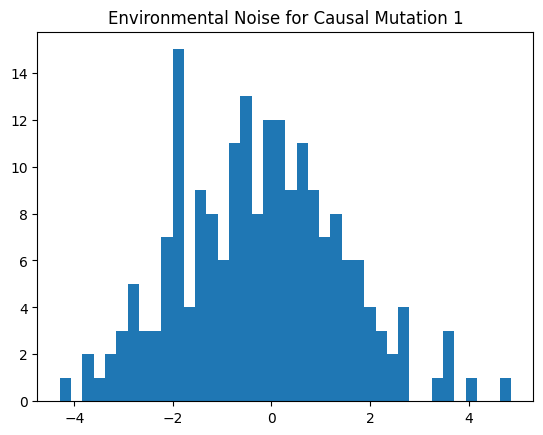

Mean of noise: -0.21947787893708223
Standard deviation of noise: 1.6562690058775007


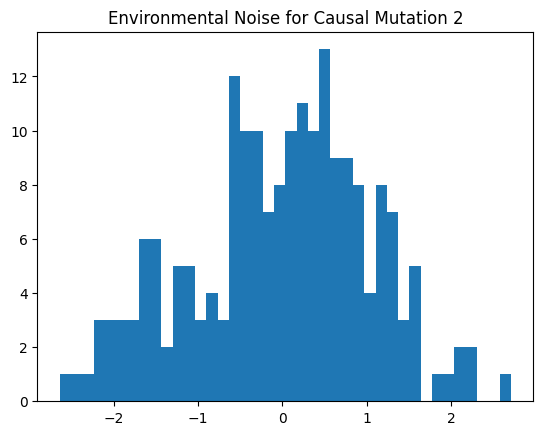

Mean of noise: -0.028129980970778453
Standard deviation of noise: 1.065390978075485


In [23]:
df_dict_test_post_normal = {k: v.sort_values('individual_id') for k, v in phenotype_df_post_normalization.groupby('causal_mutation_id')}

num = len(df_dict_test_post_normal)

for i in range(num):
  temp_df = df_dict_test_post_normal[i]
  plt.hist(temp_df["environmental_noise"], bins=40)
  plt.title("Environmental Noise for Causal Mutation " + str(i+1) )
  plt.show()
  print("Mean of noise: " + str(temp_df['environmental_noise'].mean()))
  print("Standard deviation of noise: " + str(temp_df['environmental_noise'].std()))

In [24]:
phenotype_post_normalization_final_df = normalize(phenotype_post_normalization) #normalizing the final dataframe with the phenotypes
phenotype_post_normalization_final_df

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,0.343192,0.155309,0.498500
1,1,0,0.807824,-0.520023,0.287801
2,0,1,-0.375995,0.946650,0.570655
3,1,1,0.653398,-0.333253,0.320145
4,0,2,0.502465,0.463631,0.966096
...,...,...,...,...,...
395,1,197,-1.028215,1.360334,0.332119
396,0,198,1.256199,2.002877,3.259076
397,1,198,0.080647,-1.119258,-1.038610
398,0,199,1.225346,0.723605,1.948951


In [25]:
df_dict_test_post_normal_final = {k: v.sort_values('individual_id') for k, v in phenotype_post_normalization_final_df.groupby('causal_mutation_id')}

num = len(df_dict_test_post_normal_final)

for i in range(num):
  temp_df = df_dict_test_post_normal_final[i]
  print("Variance of the phenotypes for Causal Mutation " + str(i+1) + " is "  + str(temp_df['phenotype'].var()))
  print("Variance of the genetic values for Causal Mutation " + str(i+1) + " is "  + str(temp_df['genetic_value'].var()))
  print("Variance of the noise for Causal Mutation " + str(i+1) + " is "  + str(temp_df['environmental_noise'].var()))

Variance of the phenotypes for Causal Mutation 1 is 0.9999999999999999
Variance of the genetic values for Causal Mutation 1 is 0.27598353659623187
Variance of the noise for Causal Mutation 1 is 0.7570854946191476
Variance of the phenotypes for Causal Mutation 2 is 1.0000000000000002
Variance of the genetic values for Causal Mutation 2 is 0.47896993951038197
Variance of the noise for Causal Mutation 2 is 0.5436586310255561
